Grid Search Information
Best parameters : {'max_depth': 4, 'n_estimators': 200, 'random_state': 0}
Best accuracy :  0.6305427087078324
Model Information: 
MSE:  162557241687.95737
Coefficient of determination: 0.46732283875463143
Data Comparisons According to Attribute - KM Driven


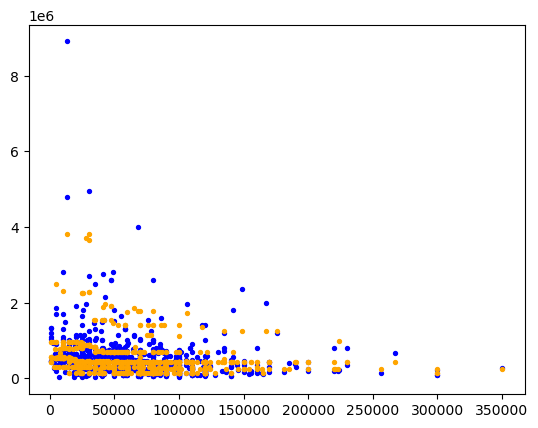

In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#things i need to add
# more parameters for grid search
# should i run grid search on test or train data
# more data visualization showing different between regression and actual data points

#prepping data
df = pd.read_csv('Cars.csv')
X = df.drop(columns=['selling_price', 'name'])

#training and testing data
train, test = train_test_split(df, test_size=0.2, random_state=42)
X_train, y_train = train.drop(columns=['selling_price', 'name']), train['selling_price']
X_test, y_test = test.drop(columns=['selling_price', 'name']), test['selling_price']

#model
#making the necessary paramters in consideration
random_forest = RandomForestRegressor(n_estimators = 100, max_depth = 4, random_state = 0)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

#grid search
#add paramter details
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [2, 3, 4],
    'random_state': [0]
    #'max_features': ['0.33', 'sqrt']
    #maybe entropy or gini
    #maybe random state
}

#running + printing grid search
grid = GridSearchCV(estimator = random_forest, param_grid = param_grid)
#not too sure whether to run on train or test

grid.fit(X_train, y_train)
print("Grid Search Information")
print("Best parameters :", grid.best_params_)
print("Best accuracy : ", grid.best_score_ )

#printing out metrics + visualization
print("Model Information: ")
print("MSE: ", mean_squared_error(y_test, y_pred))
print("Coefficient of determination:", r2_score(y_test, y_pred))

print("Data Comparisons According to Attribute - KM Driven")
plt.scatter(X_test['km_driven'], y_test, s = 8, color='blue')
plt.scatter(X_test['km_driven'], y_pred, s = 8, color='orange')

